In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv("preprocessed_data.csv")
data


,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class,bmi
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,22.79
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,17.78
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,22.46
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,21.21
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,20.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,21.78
13316,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,18.39
13317,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,23.57
13318,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,20.96


In [69]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [70]:
# Encode the 'Gender' column as 1 for 'F' and 0 for 'M'
data['gender'] = data['gender'].replace({'F': 1, 'M': 0})

In [71]:
# Split the data into training and testing sets
X = data.drop(['class'], axis=1)
y = data['class']

In [72]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [118]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [119]:
# Calculation score on Train data Adaboost Classifer
print("AdaBoost Classifier Model Accuracy on train data:", model1.score(X_train, y_train))

AdaBoost Classifier Model Accuracy on train data: 0.6016016016016016


In [120]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# calculate and print model accuracy on test data
print("AdaBoost Classifier Model Accuracy on test data:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy on test data: 0.6126126126126126


In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


In [161]:
# Create a confusion matrix
metrics.confusion_matrix(y_test, y_pred)

print("Confusion matrix: ","\n\nX: Predicted values","\nY: Real values\n\n",cm)
print("\tA\tB\tC\tD")
temp = ["A","B","C","D"]

for i in range(4):
    print(temp[i],end="")
    for j in range(4):
        print("\t",cm[i][j],end="")
    print("")

Confusion matrix:  

X: Predicted values 
Y: Real values

 [[253  87   3   0]
 [ 85 171  53  15]
 [ 35  89 159  30]
 [  5  16  98 233]]
	A	B	C	D
A	 253	 87	 3	 0
B	 85	 171	 53	 15
C	 35	 89	 159	 30
D	 5	 16	 98	 233


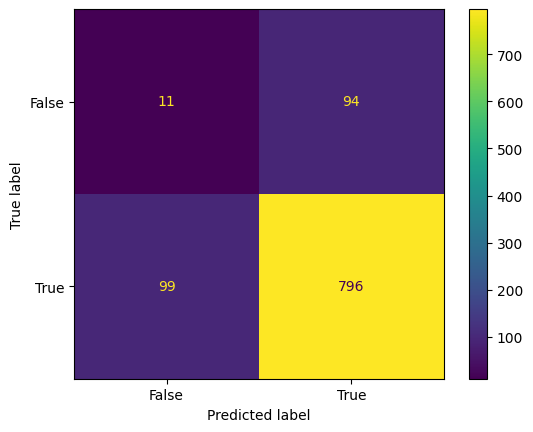

In [132]:
y_test = numpy.random.binomial(1,.9,size = 1000)
y_pred = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [153]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)

In [154]:
print("Accuracy: ", Accuracy)
print("Precision: ", Precision)
print("Sensitivity recall: ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ", F1_score)

Accuracy:  0.807
Precision:  0.8943820224719101
Sensitivity recall:  0.8893854748603351
Specificity :  0.10476190476190476
F1 score :  0.89187675070028


In [63]:
# ทดไว้


# load required classifer
from sklearn.ensemble import AdaBoostClassifier


# import Support Vector Classifier
from sklearn.svm import SVC


# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
svc=SVC(probability=True, kernel='linear')


# create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=0)


# train adaboost classifer
model2 = abc.fit(X_train, y_train)


# predict the response for test dataset
y_pred = model2.predict(X_test)


# calculate and print model accuracy
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

/Users/i_nirose/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Accuracy with SVC Base Estimator: 0.408033033033033
